# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

606

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "Imperial"

query_url = f"{url}&units={units}&appid={weather_api_key}&q="
cities

['saskylakh',
 'adrar',
 'lorengau',
 'zhigansk',
 'talara',
 'zhaoyuan',
 'tuggurt',
 'hobart',
 'taolanaro',
 'mataura',
 'chokurdakh',
 'tasiilaq',
 'thompson',
 'magui',
 'kahului',
 'vao',
 'auki',
 'yellowknife',
 'punta arenas',
 'bluff',
 'rikitea',
 'barentsburg',
 'cidreira',
 'bengkulu',
 'arraial do cabo',
 'bredasdorp',
 'natal',
 'rybnaya sloboda',
 'nichinan',
 'itarema',
 'ternate',
 'hilo',
 'preobrazheniye',
 'guarda',
 'georgetown',
 'baoding',
 'simiti',
 'ushuaia',
 'mnogovershinnyy',
 'katsuura',
 'road town',
 'anito',
 'ponta do sol',
 'avarua',
 'ca mau',
 'chumikan',
 'chuy',
 'bijar',
 'hermanus',
 'new norfolk',
 'wairoa',
 'ilulissat',
 'tombouctou',
 'batouri',
 'bardiyah',
 'pacific grove',
 'lake city',
 'grand river south east',
 'vestmannaeyjar',
 'cabo san lucas',
 'xuddur',
 'cockburn town',
 'kushima',
 'torbay',
 'wilkie',
 'vila franca do campo',
 'souillac',
 'umm kaddadah',
 'candawaga',
 'srandakan',
 'ancud',
 'butaritari',
 'petatlan',
 'port

In [4]:
#save api_keys information:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "Imperial"

#Build partial qauery URL
query_url = f"{url}&units={units}&appid={weather_api_key}&q="

In [5]:
# Performing a weather check on city using a series of API calls:

# Setting list for the loop call:
city_data = []
city_lat = []
city_lng = []
city_max_temp = []
city_humidity = []
city_clouds = []
city_wind = []
city_country = []
city_date = []


# Print to logger:
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Creating counters for printing log:
record_count = 1
set_count = 1


# Looping through all the cities in our list and performing a request:
for i, city in enumerate(cities):
       
    # Create the endpoint query_url with each city:
    city_url = query_url + city
    
    
    # Grouping cities in sets of 50 for with counters we set for printing log:
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
        
    # Printing records with set numbers and counters:
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Adding 1 to the record count for printing:
    record_count += 1

    # Running the API request for each of the cities 
    # (Using try & except)
    try:
        
        # Make request and store in json
        response = requests.get(city_url).json()
        
        
        city_data.append(response["name"])
        city_lat.append(response["coord"]["lat"])
        city_lng.append(response["coord"]["lon"])
        city_max_temp.append(response["main"]["temp_max"])
        city_humidity.append(response["main"]["humidity"])
        city_clouds.append(response["clouds"]["all"])
        city_wind.append(response["wind"]["speed"])
        city_country.append(response["sys"]["country"])
        city_date.append(response["dt"])
        
        # Suspension time to prevent api from getting locked
        time.sleep(1)
        
    # Handle exceptions for experienced error, skip the city:
    except:
        # Append null values
        print("City not found. Skipping...")
        pass 
    
# Include a print log of each city as it'sbeing processed (with the city number and city name)              
# Print when data loading is complete: 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
        
      
    

    

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | saskylakh
Processing Record 2 of Set 1 | adrar
Processing Record 3 of Set 1 | lorengau
Processing Record 4 of Set 1 | zhigansk
Processing Record 5 of Set 1 | talara
Processing Record 6 of Set 1 | zhaoyuan
Processing Record 7 of Set 1 | tuggurt
City not found. Skipping...
Processing Record 8 of Set 1 | hobart
Processing Record 9 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 10 of Set 1 | mataura
Processing Record 11 of Set 1 | chokurdakh
Processing Record 12 of Set 1 | tasiilaq
Processing Record 13 of Set 1 | thompson
Processing Record 14 of Set 1 | magui
City not found. Skipping...
Processing Record 15 of Set 1 | kahului
Processing Record 16 of Set 1 | vao
Processing Record 17 of Set 1 | auki
Processing Record 18 of Set 1 | yellowknife
Processing Record 19 of Set 1 | punta arenas
Processing Record 20 of Set 1 | bluff
Processing Record 21 of Set 1 | rikitea
Processing Record 2

Processing Record 35 of Set 4 | mastic beach
Processing Record 36 of Set 4 | mount isa
Processing Record 37 of Set 4 | storsteinnes
Processing Record 38 of Set 4 | katete
Processing Record 39 of Set 4 | hay river
Processing Record 40 of Set 4 | antofagasta
Processing Record 41 of Set 4 | klyuchi
Processing Record 42 of Set 4 | beringovskiy
Processing Record 43 of Set 4 | buala
Processing Record 44 of Set 4 | tirumullaivasal
Processing Record 45 of Set 4 | den helder
Processing Record 46 of Set 4 | palmdale
Processing Record 47 of Set 4 | humaita
Processing Record 48 of Set 4 | itoman
Processing Record 49 of Set 4 | sentyabrskiy
City not found. Skipping...
Processing Record 0 of Set 5 | ampanihy
Processing Record 1 of Set 5 | bethel
Processing Record 2 of Set 5 | ribeira grande
Processing Record 3 of Set 5 | tilichiki
Processing Record 4 of Set 5 | iqaluit
Processing Record 5 of Set 5 | olavarria
Processing Record 6 of Set 5 | corn island
Processing Record 7 of Set 5 | ponta delgada
Pro

Processing Record 21 of Set 8 | namibe
Processing Record 22 of Set 8 | muskegon
Processing Record 23 of Set 8 | haines junction
Processing Record 24 of Set 8 | geraldton
Processing Record 25 of Set 8 | lakselv
Processing Record 26 of Set 8 | kununurra
Processing Record 27 of Set 8 | bud
Processing Record 28 of Set 8 | ojinaga
Processing Record 29 of Set 8 | nabire
Processing Record 30 of Set 8 | talaya
Processing Record 31 of Set 8 | necochea
Processing Record 32 of Set 8 | okhotsk
Processing Record 33 of Set 8 | henties bay
Processing Record 34 of Set 8 | naftah
City not found. Skipping...
Processing Record 35 of Set 8 | lavrentiya
Processing Record 36 of Set 8 | ryotsu
Processing Record 37 of Set 8 | dingle
Processing Record 38 of Set 8 | daxian
City not found. Skipping...
Processing Record 39 of Set 8 | andenes
Processing Record 40 of Set 8 | okato
Processing Record 41 of Set 8 | waterloo
Processing Record 42 of Set 8 | cumaribo
City not found. Skipping...
Processing Record 43 of Se

Processing Record 11 of Set 12 | saint-leu
Processing Record 12 of Set 12 | pio xii
Processing Record 13 of Set 12 | liancheng
Processing Record 14 of Set 12 | arona
Processing Record 15 of Set 12 | khonuu
City not found. Skipping...
Processing Record 16 of Set 12 | petropavlovsk-kamchatskiy
Processing Record 17 of Set 12 | calvinia
Processing Record 18 of Set 12 | makakilo city
Processing Record 19 of Set 12 | pontal do parana
Processing Record 20 of Set 12 | kalianget
Processing Record 21 of Set 12 | samfya
Processing Record 22 of Set 12 | paveh
Processing Record 23 of Set 12 | the valley
Processing Record 24 of Set 12 | anadyr
Processing Record 25 of Set 12 | kentville
Processing Record 26 of Set 12 | madawaska
Processing Record 27 of Set 12 | dordrecht
Processing Record 28 of Set 12 | vagay
Processing Record 29 of Set 12 | tevaitoa
Processing Record 30 of Set 12 | bilibino
Processing Record 31 of Set 12 | maneadero
Processing Record 32 of Set 12 | porto seguro
Processing Record 33 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
# Creating new dataframe for cities data:
city_data_df ={
    "City": city_data, 
    "Lat": city_lat, 
    "Lng": city_lng, 
    "Max Temp": city_max_temp,
    "Humidity": city_humidity,
    "Cloudiness": city_clouds,
    "Wind Speed": city_wind,
    "Country": city_country,
     "Date": city_date}

weather_df = pd.DataFrame(city_data_df)
weather_df.count()

City          555
Lat           555
Lng           555
Max Temp      555
Humidity      555
Cloudiness    555
Wind Speed    555
Country       555
Date          555
dtype: int64

In [7]:
weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Saskylakh,71.92,114.08,1.72,92,98,6.87,RU,1603815811
1,Adrar,20.50,-10.07,96.51,10,0,10.25,MR,1603815798
2,Lorengau,-2.02,147.27,80.35,76,79,1.68,PG,1603816033
3,Zhigansk,66.77,123.37,-4.40,92,90,2.80,RU,1603815982
4,Talara,-4.58,-81.27,73.40,69,0,17.22,PE,1603816035


In [8]:
# Exporting the city data to .csv file:

weather_df.to_csv("../output_data/city_weather.csv", index=False, header=True)

In [9]:
weather_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,555.000000,555.000000,555.000000,555.000000,555.000000,555.000000,5.550000e+02
mean,19.086883,17.062937,59.677604,71.569369,53.655856,8.185495,1.603816e+09
std,33.267567,91.400197,23.861559,22.260522,38.470141,5.390387,2.503956e+02
min,-54.800000,-179.170000,-4.400000,9.000000,0.000000,0.020000,1.603816e+09
25%,-8.040000,-68.315000,43.135000,62.000000,12.500000,3.925000,1.603816e+09
50%,21.640000,22.270000,65.840000,78.000000,64.000000,7.090000,1.603816e+09
75%,47.265000,100.345000,79.145000,88.000000,90.000000,11.410000,1.603816e+09
max,78.220000,179.320000,103.570000,100.000000,100.000000,43.620000,1.603817e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [10]:
weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Saskylakh,71.92,114.08,1.72,92,98,6.87,RU,1603815811
1,Adrar,20.50,-10.07,96.51,10,0,10.25,MR,1603815798
2,Lorengau,-2.02,147.27,80.35,76,79,1.68,PG,1603816033
3,Zhigansk,66.77,123.37,-4.40,92,90,2.80,RU,1603815982
4,Talara,-4.58,-81.27,73.40,69,0,17.22,PE,1603816035


In [11]:
## Inspecting the data for cities where the humidity > 100%: 

weather_df.loc[weather_df["Humidity"] >= 100]["Humidity"].count()

22

In [12]:
# Filtered data by humidity:
filtered_df = weather_df.loc[weather_df['Humidity'] < 100]

In [13]:
len(filtered_df)

533

In [14]:
# Checking the weather_df and comparing it to the filtered_df:
len(weather_df)

555

In [15]:
filtered_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,533.000000,533.000000,533.000000,533.000000,533.000000,533.000000,5.330000e+02
mean,19.025084,16.895610,59.919212,70.395872,53.258912,8.304259,1.603816e+09
std,33.240822,90.648674,24.033886,21.936660,38.562913,5.390877,2.492092e+02
min,-54.800000,-179.170000,-4.400000,9.000000,0.000000,0.020000,1.603816e+09
25%,-7.940000,-68.300000,43.270000,61.000000,12.000000,4.000000,1.603816e+09
50%,21.460000,21.220000,66.200000,77.000000,64.000000,7.310000,1.603816e+09
75%,46.840000,98.250000,79.360000,87.000000,90.000000,11.410000,1.603816e+09
max,78.220000,179.320000,103.570000,99.000000,100.000000,43.620000,1.603817e+09


In [16]:
#  Get the indices of cities that have humidity over 100%.
over_100 = weather_df[weather_df.Humidity > 100].index
over_100

Int64Index([], dtype='int64')

In [17]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = weather_df
for x in over_100:
    clean_city_data = weather_df.drop([x])
clean_city_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Saskylakh,71.92,114.08,1.72,92,98,6.87,RU,1603815811
1,Adrar,20.50,-10.07,96.51,10,0,10.25,MR,1603815798
2,Lorengau,-2.02,147.27,80.35,76,79,1.68,PG,1603816033
3,Zhigansk,66.77,123.37,-4.40,92,90,2.80,RU,1603815982
4,Talara,-4.58,-81.27,73.40,69,0,17.22,PE,1603816035
...,...,...,...,...,...,...,...,...,...
550,Newport,51.59,-3.00,55.00,82,64,3.00,GB,1603816387
551,Santa Inês,-3.67,-45.38,95.34,42,100,6.04,BR,1603816675
552,Truckee,39.33,-120.18,44.01,45,5,9.26,US,1603816676
553,Flinders,-34.58,150.86,55.99,89,47,1.01,AU,1603816677


In [18]:
# Extract relevant fields from the cleaned dataframe
lat = clean_city_data .Lat
max_temp = clean_city_data ["Max Temp"]
humid = clean_city_data.Humidity
cloud = clean_city_data.Cloudiness
wind = clean_city_data['Wind Speed']

# Export the clean_city_data into a csv:
clean_city_data.to_csv("../output_data/clean_city_data.csv", index=False, header=True)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

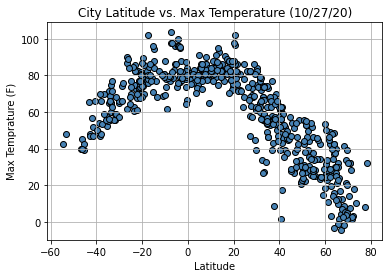

In [19]:
# Plot 1: Latitude vs. Temperature Plot
x_values = lat
y_values = max_temp

plt.scatter(x_values,y_values, marker = "o", facecolor = "steelblue", edgecolor="black")

plt.xlabel('Latitude')
plt.ylabel('Max Temprature (F)')
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.grid()
plt.savefig("../Images/lat_vs_temp.png")
plt.show()


## Latitude vs. Humidity Plot

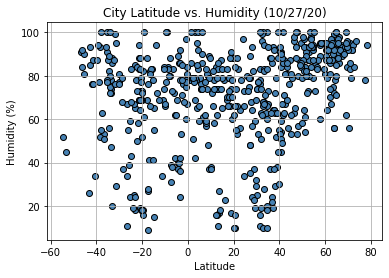

In [20]:
# Plot 2: Latitude vs. Humidity Plot
x_values = lat
y_values = humid

plt.scatter(x_values,y_values, marker = "o", facecolor = "steelblue", edgecolor="black")

plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.grid()
plt.savefig("../Images/lat_vs_humid.png")
plt.show()



## Latitude vs. Cloudiness Plot

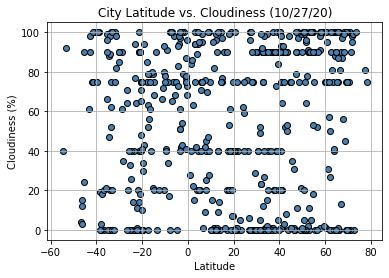

In [21]:
# Plot 3: Latitude vs. Cloudiness Plot
x_values = lat
y_values = cloud

plt.scatter(x_values,y_values, marker = "o", facecolor = "steelblue", edgecolor="black")

plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.grid()
plt.savefig("../Images/lat_vs_cloud.png")
plt.show()

## Latitude vs. Wind Speed Plot

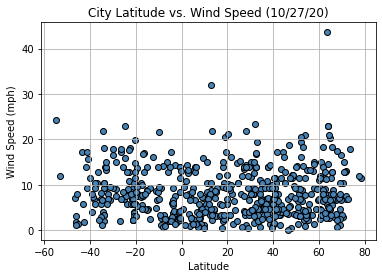

In [22]:
# Plot 4: Latitude vs. Wind Speed Plot
x_values = lat
y_values = wind

plt.scatter(x_values,y_values, marker = "o", facecolor = "steelblue", edgecolor="black")

plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.grid()
plt.savefig("../Images/lat_vs_wind.png")
plt.show()

## Linear Regression

In [23]:
# Creating northern and southern hemisphere dataframe for linear regression:

north_hemisphere = clean_city_data.loc[clean_city_data["Lat"] >= 0]
south_hemisphere = clean_city_data.loc[clean_city_data["Lat"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The p-value is: 7.411668418893868e-121
The r-value is: -0.8755642533728178


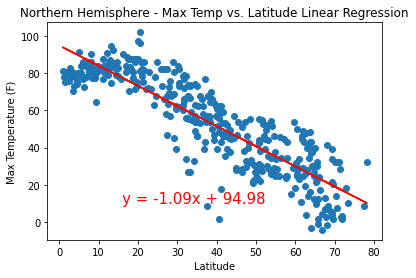

In [24]:
# Northern Hemisphere - Max Temp vs. Latitude Linear Regression: 
x_values = pd.to_numeric(north_hemisphere['Lat']).astype(float)
y_values = pd.to_numeric(north_hemisphere['Max Temp']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot 1: Northern Hemisphere - Max Temp vs. Latitude Linear Regression
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(16,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')

# Calculated pvalue to determine whether correlation is significant(if there is truly a relationship):
print(f"The p-value is: {pvalue}")
print(f"The r-value is: {rvalue}")

plt.savefig("../Images/north_temp_lg.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The p-value is: 6.9320017033030215e-34
The r-value is: 0.7548913559468133


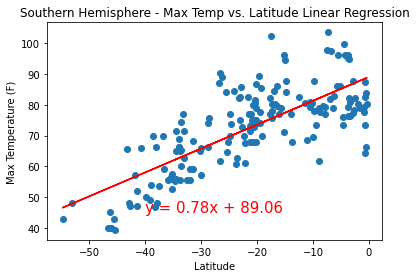

In [25]:
# Southern Hemisphere - Max Temp vs. Latitude Linear Regression:
x_values = pd.to_numeric(south_hemisphere['Lat']).astype(float)
y_values = pd.to_numeric(south_hemisphere['Max Temp']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot 2: Southern Hemisphere - Max Temp vs. Latitude Linear Regression
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40,45),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')

# Calculated pvalue to determine whether correlation is significant(if there is truly a relationship):
print(f"The p-value is: {pvalue}")
print(f"The r-value is: {rvalue}")

plt.savefig("../Images/south_temp_lg.png")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The p-value is: 1.0624331832473881e-12
The r-value is: 0.355469323297045


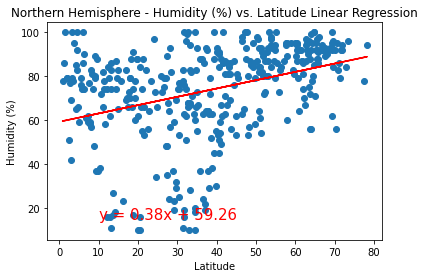

In [26]:
# Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression
x_values = pd.to_numeric(north_hemisphere['Lat']).astype(float)
y_values = pd.to_numeric(north_hemisphere['Humidity']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot 3: Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,15),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression')

# Calculated pvalue to determine whether correlation is significant(if there is truly a relationship):
print(f"The p-value is: {pvalue}")
print(f"The r-value is: {rvalue}")

plt.savefig("../Images/north_humidity_lg.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The p-value is: 0.24285480316054536
The r-value is: -0.08823714798505451


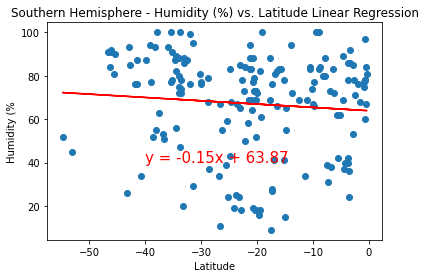

In [27]:
# Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression
x_values = pd.to_numeric(south_hemisphere['Lat']).astype(float)
y_values = pd.to_numeric(south_hemisphere['Humidity']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot 4: Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40,40),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%')
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression')

# Calculated pvalue to determine whether correlation is significant(if there is truly a relationship):
print(f"The p-value is: {pvalue}")
print(f"The r-value is: {rvalue}")

plt.savefig("../Images/south_humidity_lg.png")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The p-value is: 0.0006570073723720795
The r-value is: 0.17446502440400488


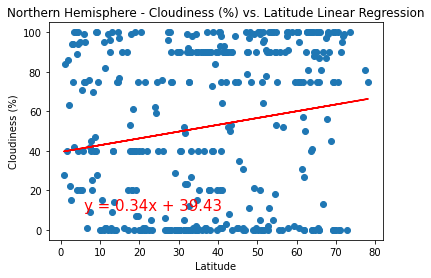

In [28]:
# Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
x_values = pd.to_numeric(north_hemisphere['Lat']).astype(float)
y_values = pd.to_numeric(north_hemisphere['Cloudiness']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot 5: Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')

# Calculated pvalue to determine whether correlation is significant(if there is truly a relationship):
print(f"The p-value is: {pvalue}")
print(f"The r-value is: {rvalue}")

plt.savefig("../Images/north_cloud_lg.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The p-value is: 0.0210271435868828
The r-value is: 0.17335503025044538


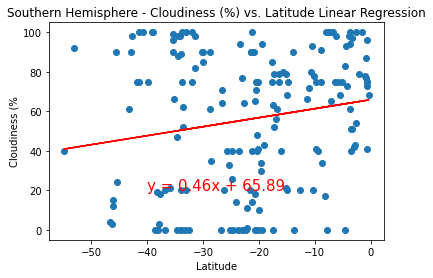

In [29]:
# Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression:
x_values = pd.to_numeric(south_hemisphere['Lat']).astype(float)
y_values = pd.to_numeric(south_hemisphere['Cloudiness']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot 6: Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%')
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')

# Calculated pvalue to determine whether correlation is significant(if there is truly a relationship):
print(f"The p-value is: {pvalue}")
print(f"The r-value is: {rvalue}")

plt.savefig("../Images/south_cloud_lg.png")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The p-value is: 0.02210029211980767
The r-value is: 0.1176953222484177


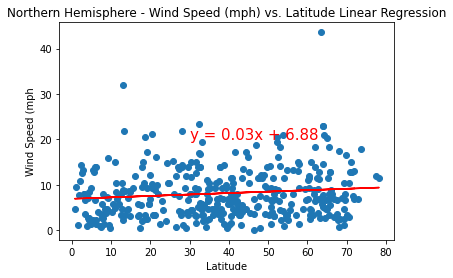

In [30]:
# Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression:
x_values = pd.to_numeric(north_hemisphere['Lat']).astype(float)
y_values = pd.to_numeric(north_hemisphere['Wind Speed']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot 7: Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(30,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph')
plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')

# Calculated pvalue to determine whether correlation is significant(if there is truly a relationship):
print(f"The p-value is: {pvalue}")
print(f"The r-value is: {rvalue}")

plt.savefig("../Images/north_wind_lg.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The p-value is: 0.021407098992415365
The r-value is: -0.17285408840821911


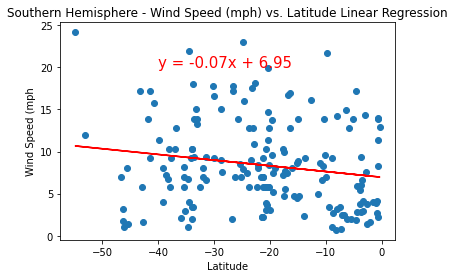

In [31]:
# Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression: 
x_values = pd.to_numeric(south_hemisphere['Lat']).astype(float)
y_values = pd.to_numeric(south_hemisphere['Wind Speed']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot 8: Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph')
plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')

# Calculated pvalue to determine whether correlation is significant(if there is truly a relationship):
print(f"The p-value is: {pvalue}")
print(f"The r-value is: {rvalue}")

plt.savefig("../Images/south_wind_lg.png")
plt.show()